In [17]:
# Import necessary libraries for data handling and exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data = pd.read_csv('Cardiotocographic.csv')
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [18]:
# Check for missing values and data types
print(data.info())
# Check for any unusual valuesin numerical columns
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
None


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [20]:
# 1. Data Cleaning and Preparation

print("1.Data Cleaning and Preparation\n")
#To find the null values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

data_cleaned = data.dropna()
print("\nData types before conversion:\n", data_cleaned.dtypes)
#Data Conversion
data_cleaned = data_cleaned.apply(pd.to_numeric, errors='coerce')
print("\nData types after conversion:\n", data_cleaned.dtypes)

#Finding outliers
from scipy.stats import zscore

z_scores = np.abs(zscore(data_cleaned))
outliers = (z_scores > 3).all(axis=1)
print("\nNumber of outliers detected:", np.sum(outliers))
data_no_outliers = data_cleaned[~outliers]

1.Data Cleaning and Preparation

Missing values in each column:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

Data types before conversion:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

Data types after conversion:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

Number of outliers detected: 0


In [24]:
# 2. Statistical Summary
print("2.Statistical Summary:")

summary = data_no_outliers.describe()
print(summary)

mean_fhr = summary.loc['mean', 'LB']
median_fhr = summary.loc['50%', 'LB']
std_fhr = summary.loc['std', 'LB']
print("\nMean baseline for FHR:",mean_fhr)
print("\nMedian baseline for FHR:",median_fhr)
print("\nStandard deviation for FHR:",std_fhr)

2.Statistical Summary:
                LB           AC           FM           UC           DL  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean    133.343598     0.003202     0.009963     0.004388     0.001892   
std      11.270154     0.004324     0.067870     0.003350     0.003348   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001838     0.000000   
50%     133.000000     0.001631     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002554     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean      0.000003     0.000175    46.996929     1.361006    10.353647   
std       0.000142     0.000840    18.847737     1.173164    21.282102   
min      -0.00

3.Data Visualization

Data Visualization


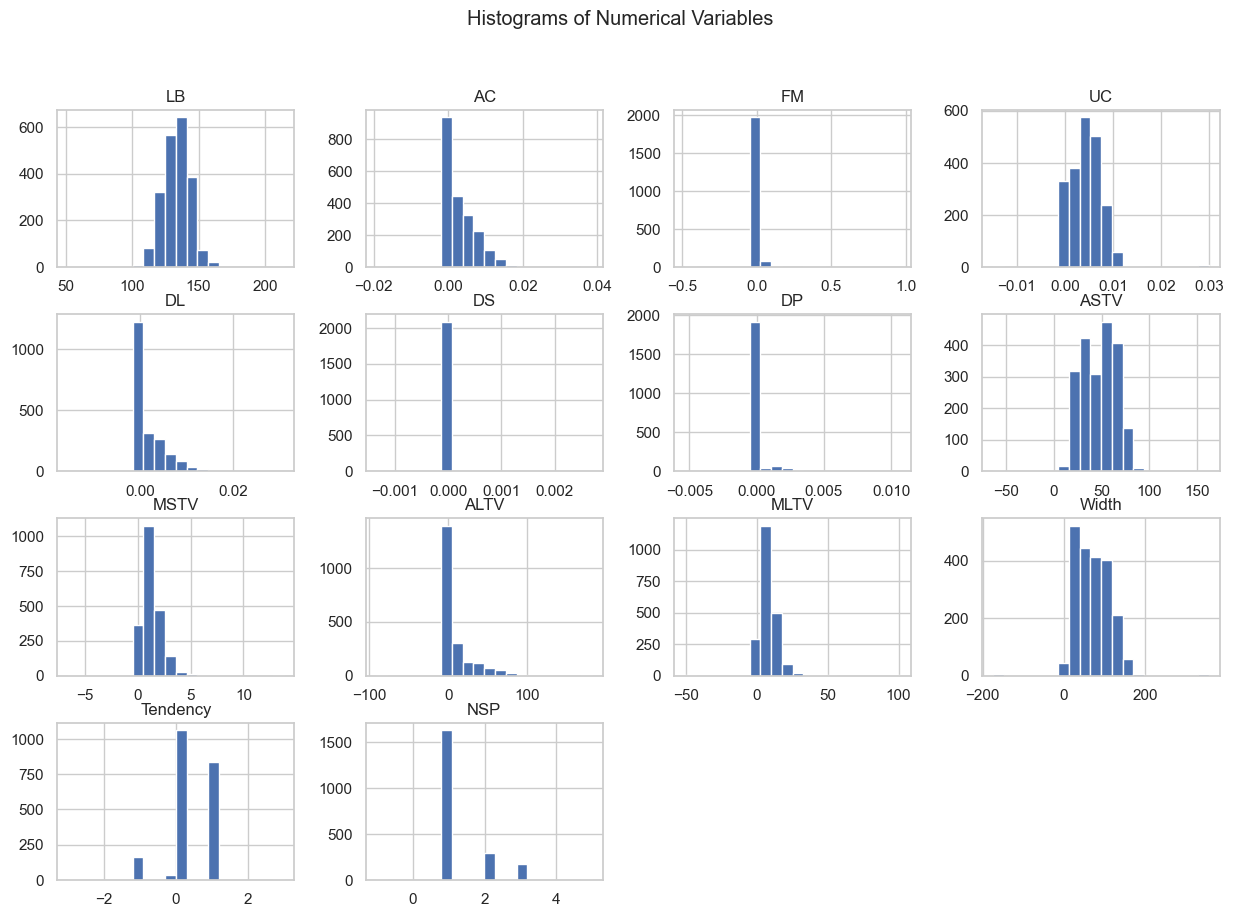

In [25]:
# 3. Data Visualization

print("3.Data Visualization")

print("\nData Visualization")

data_no_outliers.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

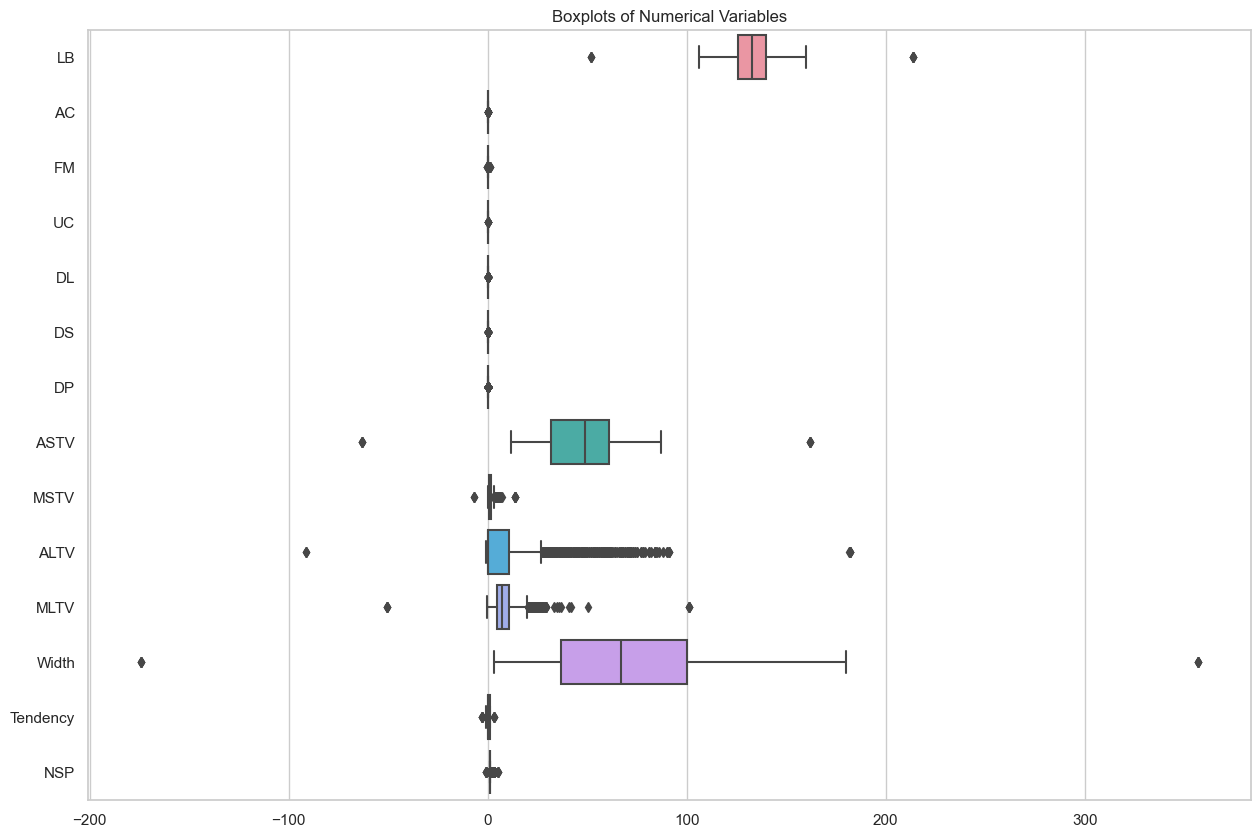

In [27]:
#Boxplot for variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_no_outliers, orient='h')
plt.title('Boxplots of Numerical Variables')
plt.show()

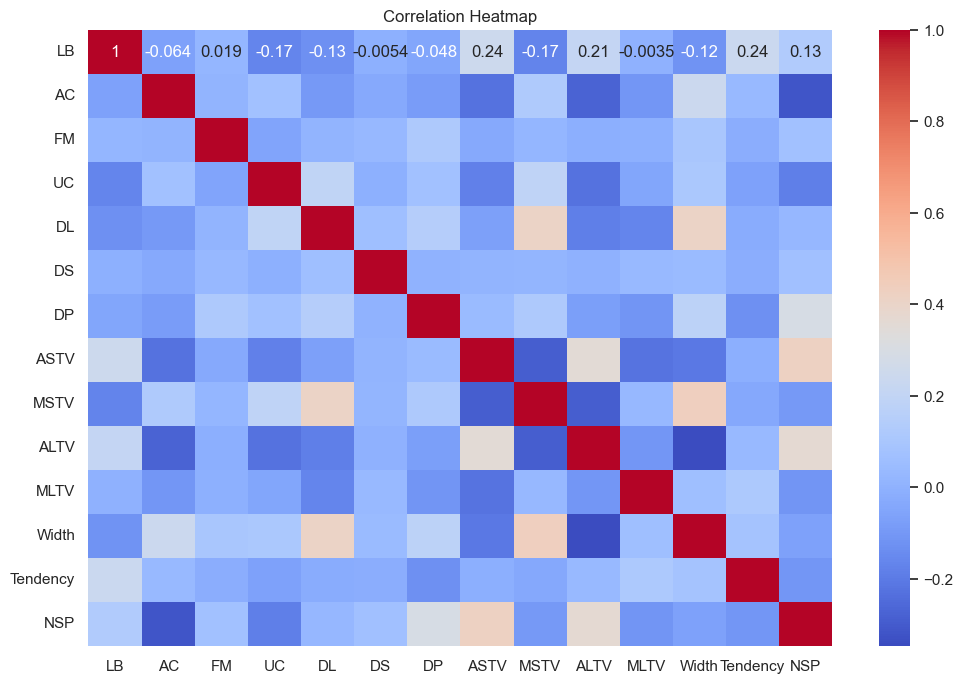

In [28]:
#Correlation heatmmap of outliers
plt.figure(figsize=(12, 8))
correlation_matrix = data_no_outliers.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Kanta. Sai Dhanush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kanta. Sai Dhanush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kanta. Sai Dhanush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kanta. Sai Dhanush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

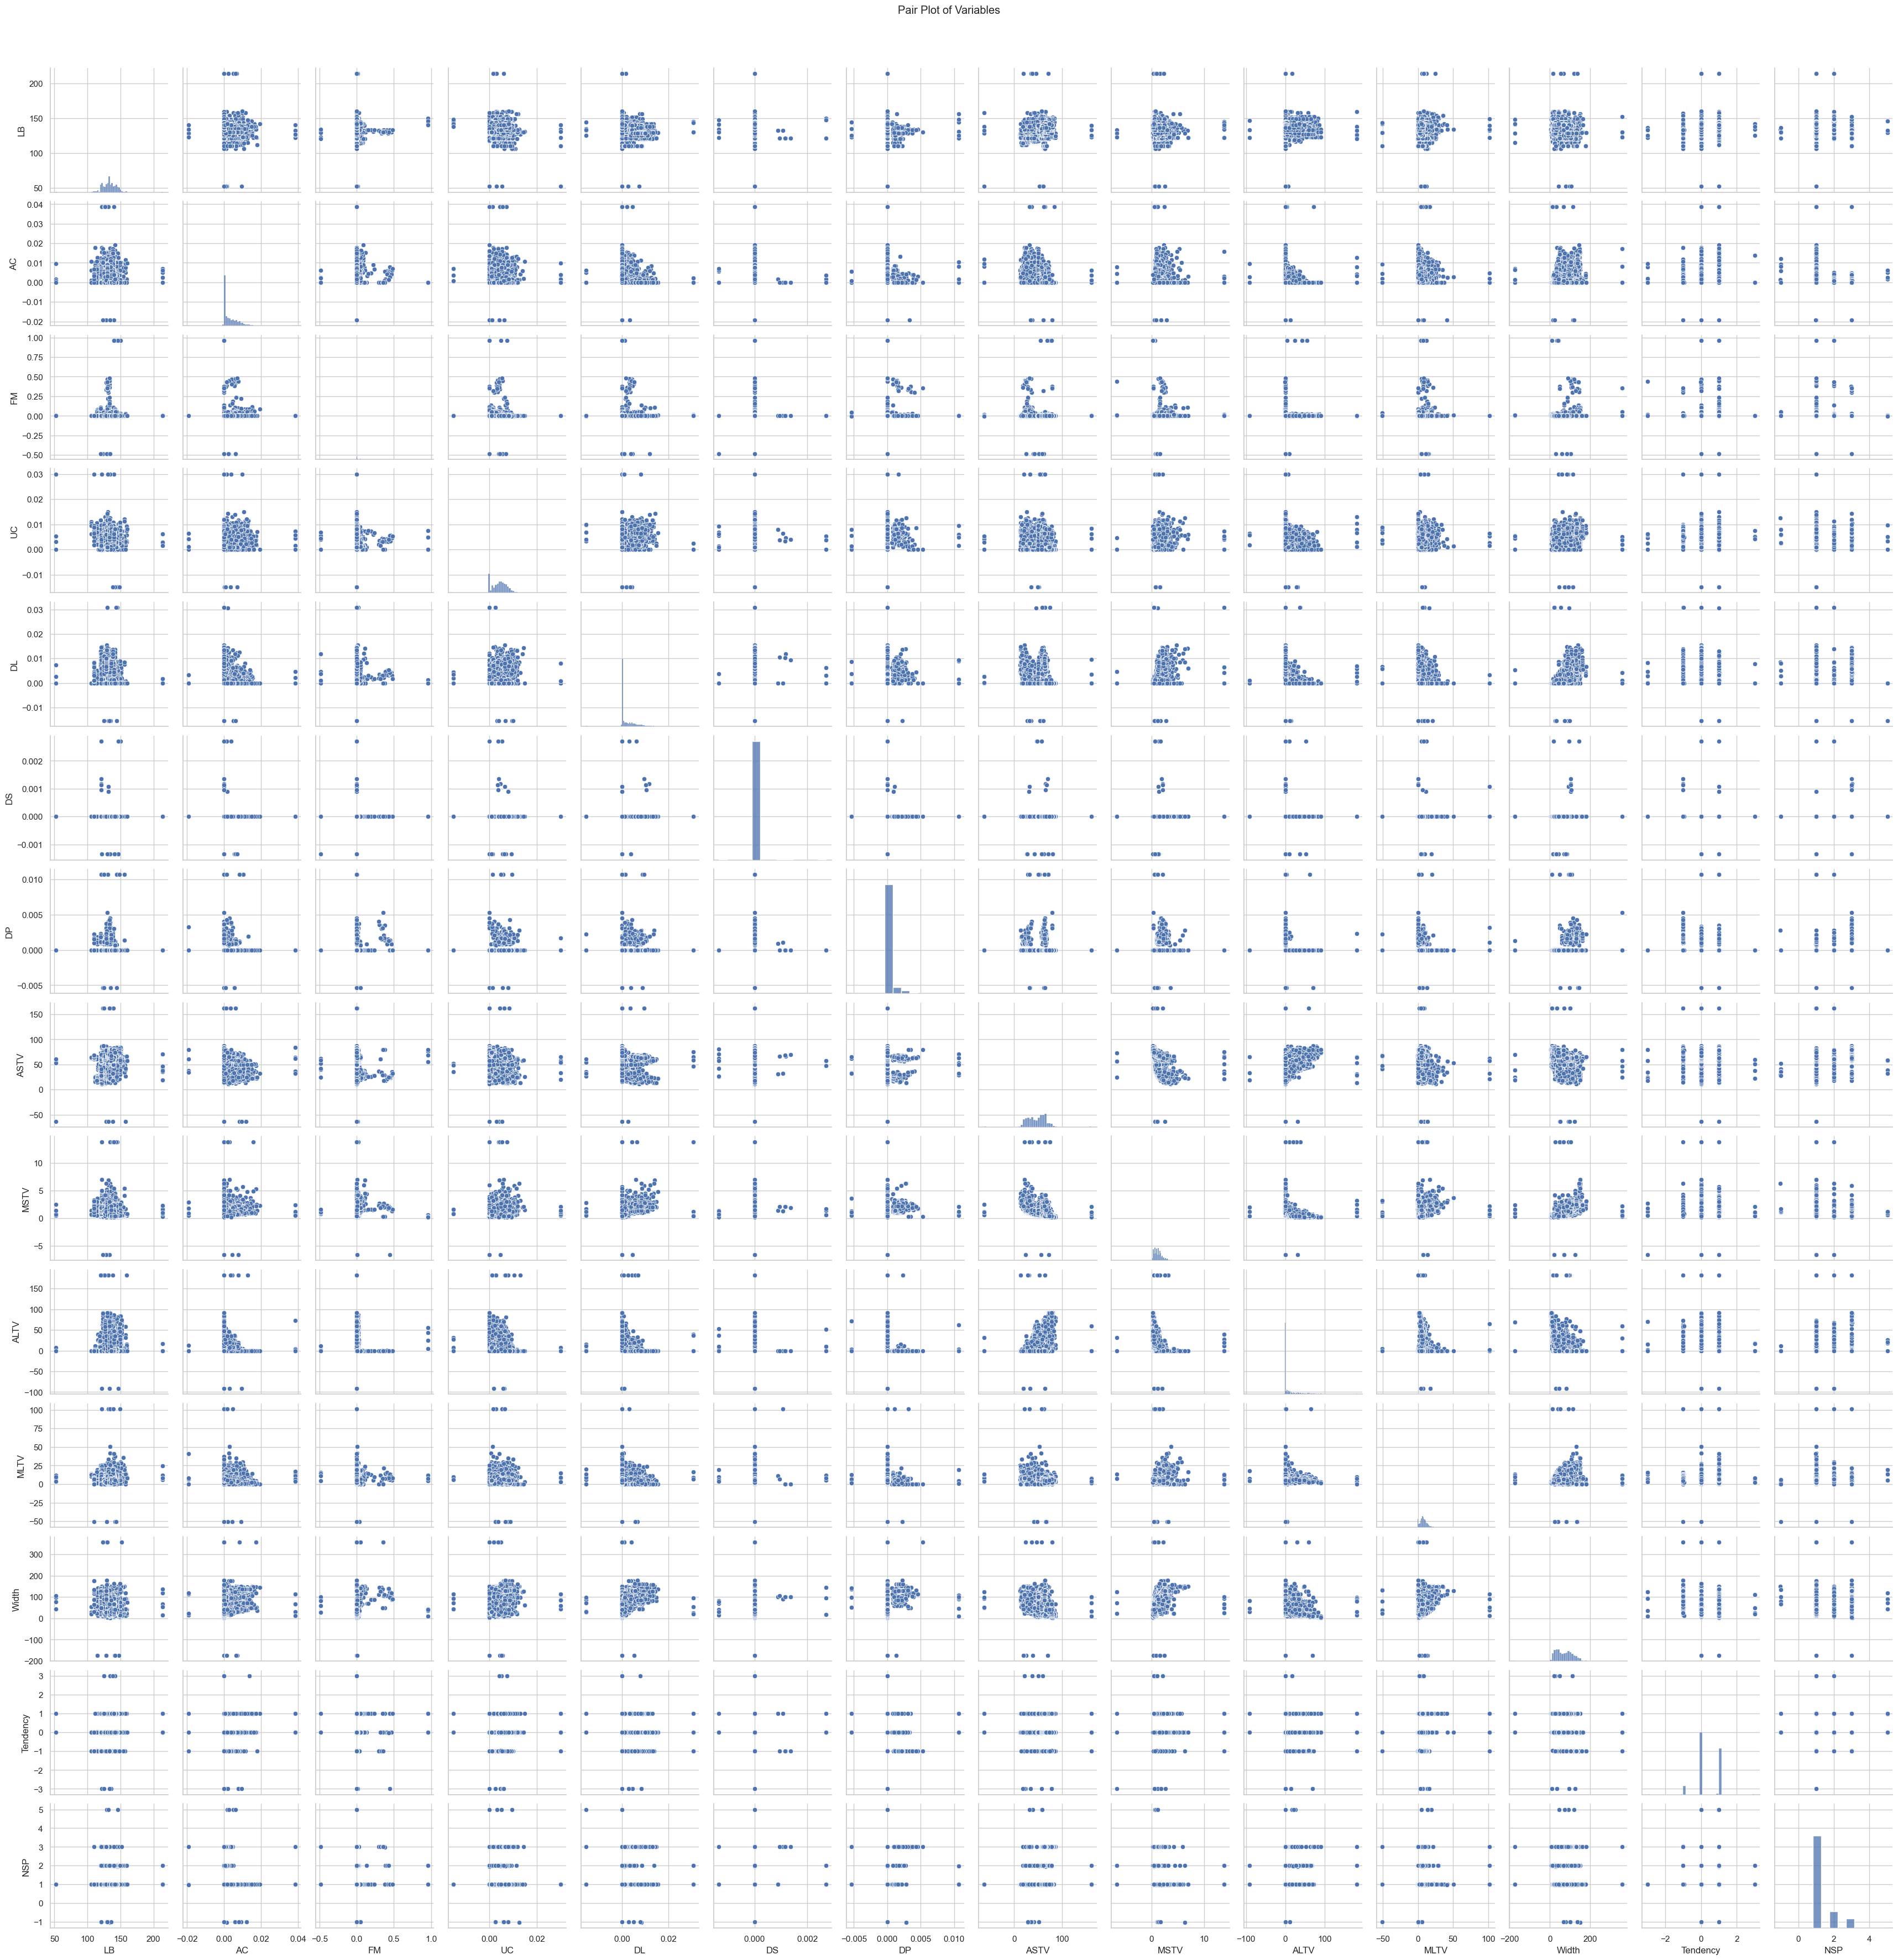

In [29]:
sns.pairplot(data_no_outliers)
plt.suptitle('Pair Plot of Variables', y=1.02)
plt.show()

In [31]:
# 4. Pattern Recognition and Insights
print("4. Pattern Recognition and Insights\n")
strong_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
print("Strong correlations between variables:\n", strong_correlations)

4. Pattern Recognition and Insights

Strong correlations between variables:
            LB   AC   FM   UC   DL   DS   DP  ASTV  MSTV  ALTV  MLTV  Width  \
LB        1.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
AC        NaN  1.0  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
FM        NaN  NaN  1.0  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
UC        NaN  NaN  NaN  1.0  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
DL        NaN  NaN  NaN  NaN  1.0  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
DS        NaN  NaN  NaN  NaN  NaN  1.0  NaN   NaN   NaN   NaN   NaN    NaN   
DP        NaN  NaN  NaN  NaN  NaN  NaN  1.0   NaN   NaN   NaN   NaN    NaN   
ASTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   1.0   NaN   NaN   NaN    NaN   
MSTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   1.0   NaN   NaN    NaN   
ALTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   1.0   NaN    NaN   
MLTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   1

In [32]:
# 5. Conclusion
Summary of key insights:
    
1. The mean baseline fetal heart rate (FHR) is 133.34 bpm, with a standard deviation of 11.27.
2. The correlation heatmap reveals strong positive and negative correlations between certain variables.
3. Boxplots and histograms show the distribution and spread of numerical variables, indicating the presence of outliers.

Potential Impact:
    
1. These findings can help healthcare professionals monitor fetal health more accurately.
2. Strong correlations between variables may provide insights into underlying physiological processes.
3. Further analysis could focus on time-related patterns if temporal data is included.

Recommendations for Further Analysis:
    
1. Perform a more detailed analysis of temporal patterns if time-related data is available.
2. Investigate the causes of outliers and their impact on the overall analysis.
3. Use advanced machine learning models to predict outcomes based on these variables.

SyntaxError: invalid syntax (3810947355.py, line 2)